<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.475041,95.835318,62.676240,76.011387,0.019744,265.017730,264.995332,0.022398
1,0.0,1.0,62.984177,48.069450,61.695244,26.311748,-0.052337,209.008281,209.054671,-0.046389
2,0.0,2.0,64.570458,38.610275,91.034614,63.765552,-0.072641,267.908259,267.963567,-0.055307
3,0.0,3.0,61.130528,23.324121,29.243780,64.166993,-0.016801,187.848621,187.865824,-0.017204
4,0.0,4.0,72.516059,30.321244,98.412879,39.392405,-0.033629,250.608957,250.621166,-0.012209
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,45.164424,28.958457,60.228817,34.562360,0.064147,178.978205,178.952108,0.026097
19996,999.0,16.0,98.837682,35.390402,50.544962,76.012608,-0.071311,270.714343,270.795760,-0.081418
19997,999.0,17.0,79.840311,23.492807,20.635752,85.697041,-0.029368,219.636543,219.670347,-0.033804
19998,999.0,18.0,63.595786,97.341125,64.988305,48.720863,-0.003624,284.642455,284.646649,-0.004194


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.475041,95.835318,62.676240,76.011387,0.019744,265.017730,264.995332,0.022398
1,0.0,1.0,62.984177,48.069450,61.695244,26.311748,-0.052337,209.008281,209.054671,-0.046389
2,0.0,2.0,64.570458,38.610275,91.034614,63.765552,-0.072641,267.908259,267.963567,-0.055307
3,0.0,3.0,61.130528,23.324121,29.243780,64.166993,-0.016801,187.848621,187.865824,-0.017204
4,0.0,4.0,72.516059,30.321244,98.412879,39.392405,-0.033629,250.608957,250.621166,-0.012209
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,45.164424,28.958457,60.228817,34.562360,0.064147,178.978205,178.952108,0.026097
19996,999.0,16.0,98.837682,35.390402,50.544962,76.012608,-0.071311,270.714343,270.795760,-0.081418
19997,999.0,17.0,79.840311,23.492807,20.635752,85.697041,-0.029368,219.636543,219.670347,-0.033804
19998,999.0,18.0,63.595786,97.341125,64.988305,48.720863,-0.003624,284.642455,284.646649,-0.004194


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730   
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281   
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259   
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621   
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205   
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343   
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543   
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455   
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    264.995332  0.022398  
      1.0    209.054671 -0.046389  
      2.0    267.963567 -0.055307  
      3.0    187.865824 -0.017204  
      4.0    250.621166 -0.012209  
...                 ...       ...  
999.0 15.0   178.952108  0.026097  
      16.0   270.795760 -0.081418  
      17.0   219.670347 -0.033804  
      18.0   284.646649 -0.004194  
      19.0   258.274582 -0.007338  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730   
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281   
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259   
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621   
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205   
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343   
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543   
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455   
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    264.995332  0.022398  
      1.0    209.054671 -0.046389  
      2.0    267.963567 -0.055307  
      3.0    187.865824 -0.017204  
      4.0    250.621166 -0.012209  
...                 ...       ...  
999.0 15.0   178.952108  0.026097  
      16.0   270.795760 -0.081418  
      17.0   219.670347 -0.033804  
      18.0   284.646649 -0.004194  
      19.0   258.274582 -0.007338  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.475041,95.835318,62.676240,76.011387,0.019744,265.017730,264.995332,0.022398
1,0.0,1.0,62.984177,48.069450,61.695244,26.311748,-0.052337,209.008281,209.054671,-0.046389
2,0.0,2.0,64.570458,38.610275,91.034614,63.765552,-0.072641,267.908259,267.963567,-0.055307
3,0.0,3.0,61.130528,23.324121,29.243780,64.166993,-0.016801,187.848621,187.865824,-0.017204
4,0.0,4.0,72.516059,30.321244,98.412879,39.392405,-0.033629,250.608957,250.621166,-0.012209
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,45.164424,28.958457,60.228817,34.562360,0.064147,178.978205,178.952108,0.026097
19996,999.0,16.0,98.837682,35.390402,50.544962,76.012608,-0.071311,270.714343,270.795760,-0.081418
19997,999.0,17.0,79.840311,23.492807,20.635752,85.697041,-0.029368,219.636543,219.670347,-0.033804
19998,999.0,18.0,63.595786,97.341125,64.988305,48.720863,-0.003624,284.642455,284.646649,-0.004194


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730   
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281   
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259   
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621   
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205   
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343   
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543   
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455   
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    264.995332  0.022398  
      1.0    209.054671 -0.046389  
      2.0    267.963567 -0.055307  
      3.0    187.865824 -0.017204  
      4.0    250.621166 -0.012209  
...                 ...       ...  
999.0 15.0   178.952108  0.026097  
      16.0   270.795760 -0.081418  
      17.0   219.670347 -0.033804  
      18.0   284.646649 -0.004194  
      19.0   258.274582 -0.007338  

[20000 rows x 8 columns]

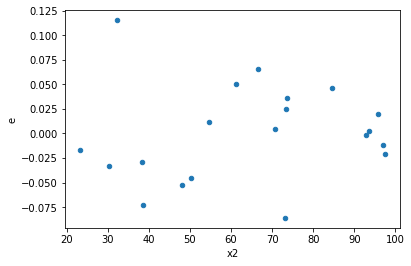

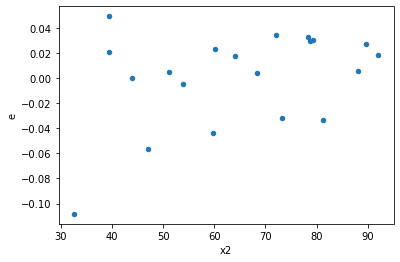

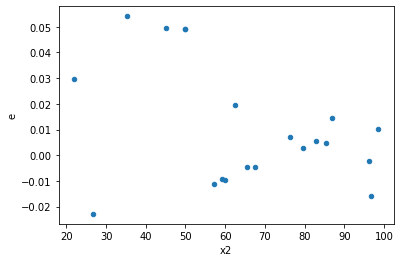

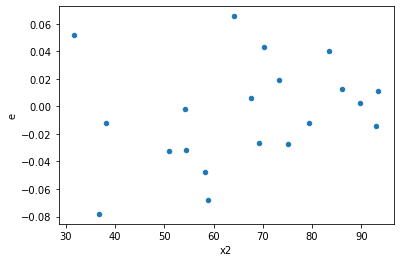

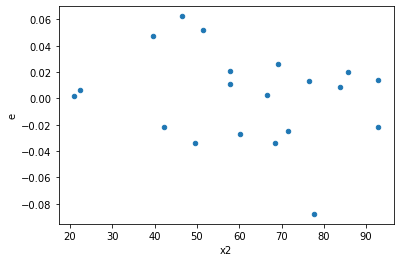

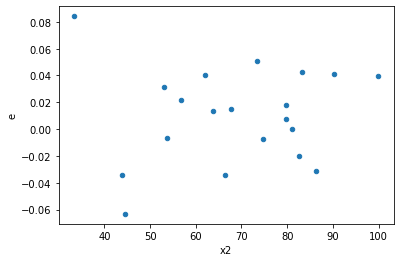

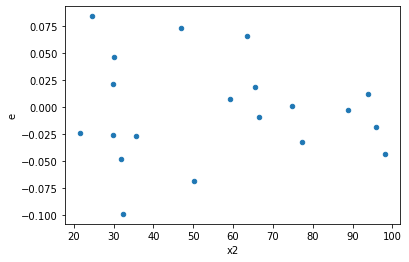

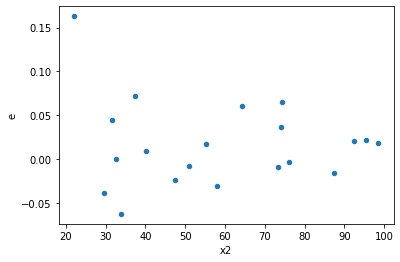

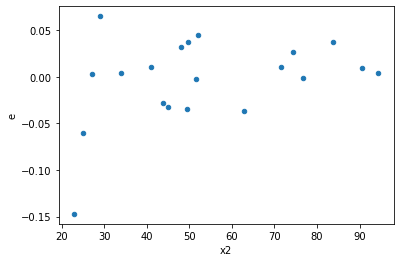

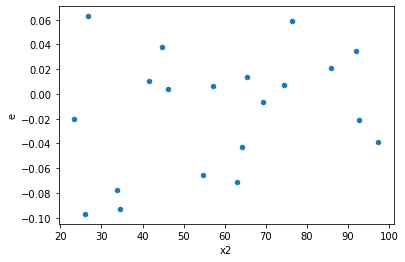

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,4.0,4.0,0.000568888229998747,0.002519692698683874,0.00014222205749968674,0.0006299231746709685,4.429152451773214,0.1785619138360761,0.9107190430819619,0.08928095691803806,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.0008956388960498011,0.004308337511988767,0.00022390972401245028,0.0010770843779971918,4.810351058881666,0.15733250026154777,0.9213337498692261,0.07866625013077388,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.005402093924582121,0.008799828609784675,0.0013505234811455303,0.0021999571524461688,1.6289662365441722,0.6479798983275318,0.6760100508362341,0.3239899491637659,Reject001=1 : Homoscedasticity
10.0,4.0,4.0,0.003075554646049786,0.004237155910705197,0.0007688886615124465,0.0010592889776762993,1.3776883841577523,0.7637337168760161,0.618133141561992,0.38186685843800805,Reject001=1 : Homoscedasticity
11.0,4.0,4.0,0.0020843914620078978,0.004961854235530596,0.0005210978655019744,0.001240463558882649,2.3804809825649706,0.42149835910019595,0.789250820449902,0.21074917955009798,Reject001=1 : Homoscedasticity
15.0,4.0,4.0,0.007049577865224723,0.012903009018418862,0.0017623944663061808,0.0032257522546047155,1.8303236399542266,0.5725736565831663,0.7137131717084169,0.28628682829158314,Reject001=1 : Homoscedasticity
17.0,4.0,4.0,0.0016515101363410512,0.01474924156568654,0.0004128775340852628,0.003687310391421635,8.930760545232703,0.05675533185498871,0.9716223340725056,0.028377665927494355,Reject001=1 : Homoscedasticity
24.0,4.0,4.0,0.0003804293211691677,0.001922597752084355,9.510733029229193e-05,0.00048064943802108873,5.053758070423342,0.1456902242142939,0.927154887892853,0.07284511210714695,Reject001=1 : Homoscedasticity
26.0,4.0,4.0,0.0008072114057293111,0.006392301533503321,0.00020180285143232778,0.0015980753833758302,7.918993076823427,0.0697879060186537,0.9651060469906731,0.03489395300932685,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.018590095575697366,0.011138975240781585,0.004647523893924341,0.002784743810195396,0.5991887021465048,0.6319208803065847,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,0.003787908745743005,0.0002295541412660296,0.0009469771864357513,5.73885353165074e-05,0.06060181400199021,0.018843040369138565,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,0.000568888229998747,0.002519692698683874,0.00014222205749968674,0.0006299231746709685,4.429152451773214,0.1785619138360761,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,0.0008956388960498011,0.004308337511988767,0.00022390972401245028,0.0010770843779971918,4.810351058881666,0.15733250026154777,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,0.004286821866419148,0.0007792928841815454,0.001071705466604787,0.00019482322104538634,0.18178802583007755,0.1274127911433289,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,0.005402093924582121,0.008799828609784675,0.0013505234811455303,0.0021999571524461688,1.6289662365441722,0.6479798983275318,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,0.01490896480369102,0.003363035824744897,0.003727241200922755,0.0008407589561862242,0.2255713839979224,0.1783153890761793,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,0.0020107133274442877,0.0018746234094923486,0.0005026783318610719,0.00046865585237308716,0.9323175929186703,0.9474816703961175,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,0.009847948432422576,0.0020238559583710346,0.002461987108105644,0.0005059639895927587,0.20551041389573665,0.154554607439548,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      952
Reject001=0 : Heteroscedasticity     48
Name: Result_test, dtype: int64